In [125]:
# import necessary libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from models.prepareData import convertData
from models.models import linearRegressionModel, polynomialRegression

In [126]:
df_data = pd.read_csv('data_thesis/data_2.csv', skipfooter=1, engine='python')

In [127]:
# select specific cols:
df_data = df_data[['transaction_type', 'property_type', 'price', 'area', 'addr_street', 'addr_ward', 'addr_district', 'addr_city', 'created_date']]

# select specific area:
# df_data = df_data[
#                 (df_data['transaction_type'] == 'bán') &
#                 (df_data['property_type'] == 'căn hộ chung cư') &
#                 (df_data['area'] > 0) &
#                 (df_data['price'] > 0) &
#                 (df_data['addr_street'] == 'đường nguyễn hữu thọ') &
#                 (df_data['addr_ward'] == 'xã phước kiển') &
#                 (df_data['addr_district'] == 'nhà bè') &
#                 (df_data['addr_city'] == 'hồ chí minh')
#                 ]
df_data = df_data[
                (df_data['transaction_type'] == 'bán') &
                (df_data['property_type'] == 'căn hộ chung cư') &
                (df_data['area'] > 0) &
                (df_data['price'] > 0) &
                (df_data['addr_street'] == 'đường nguyễn hữu thọ') &
                (df_data['addr_ward'] == 'xã phước kiển') &
                (df_data['addr_district'] == 'nhà bè') &
                (df_data['addr_city'] == 'hồ chí minh')
                ]

In [128]:
df_data

,transaction_type,property_type,price,area,addr_street,addr_ward,addr_district,addr_city,created_date
109925,bán,căn hộ chung cư,12.685950,242.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-23
111515,bán,căn hộ chung cư,13.200000,250.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-16
111516,bán,căn hộ chung cư,13.200000,250.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-21
113002,bán,căn hộ chung cư,13.913043,230.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-17
113896,bán,căn hộ chung cư,14.000000,250.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-03
...,...,...,...,...,...,...,...,...,...
217721,bán,căn hộ chung cư,52.027027,74.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-12
218839,bán,căn hộ chung cư,52.828675,74.77,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-03
221103,bán,căn hộ chung cư,54.117647,85.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-27
221104,bán,căn hộ chung cư,54.117647,85.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-27


In [129]:
# check if data is null:
df_data.isnull()

,transaction_type,property_type,price,area,addr_street,addr_ward,addr_district,addr_city,created_date
109925,False,False,False,False,False,False,False,False,False
111515,False,False,False,False,False,False,False,False,False
111516,False,False,False,False,False,False,False,False,False
113002,False,False,False,False,False,False,False,False,False
113896,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
217721,False,False,False,False,False,False,False,False,False
218839,False,False,False,False,False,False,False,False,False
221103,False,False,False,False,False,False,False,False,False
221104,False,False,False,False,False,False,False,False,False


In [130]:
# drop null values:
df_data = df_data.dropna()

In [131]:
# sort values by created date
df_data = df_data.sort_values(by=['created_date'])

In [132]:
# Drop duplicates:    
df_data = df_data.drop_duplicates(subset='area', keep='last', inplace=False)

In [133]:
# data after preprocessing:
df_data

,transaction_type,property_type,price,area,addr_street,addr_ward,addr_district,addr_city,created_date
150762,bán,căn hộ chung cư,26.495726,117.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-12
151553,bán,căn hộ chung cư,26.699029,61.80,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-12
195952,bán,căn hộ chung cư,41.000000,87.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-12
185021,bán,căn hộ chung cư,36.896479,94.86,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-16
189063,bán,căn hộ chung cư,38.335936,70.43,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-16
...,...,...,...,...,...,...,...,...,...
211241,bán,căn hộ chung cư,48.261178,70.45,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-07
190372,bán,căn hộ chung cư,38.947368,95.00,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-07
207354,bán,căn hộ chung cư,46.140536,104.03,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-07
206017,bán,căn hộ chung cư,45.454545,70.40,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-07


In [134]:
df_data['area'] = (df_data['area']+1).transform(np.log)
df_data['price'] = (df_data['price']+1).transform(np.log)

In [135]:
df_data

,transaction_type,property_type,price,area,addr_street,addr_ward,addr_district,addr_city,created_date
150762,bán,căn hộ chung cư,3.314031,4.770685,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-12
151553,bán,căn hộ chung cư,3.321397,4.139955,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-12
195952,bán,căn hộ chung cư,3.737670,4.477337,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-12
185021,bán,căn hộ chung cư,3.634858,4.562889,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-16
189063,bán,căn hộ chung cư,3.672139,4.268718,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-10-16
...,...,...,...,...,...,...,...,...,...
211241,bán,căn hộ chung cư,3.897136,4.268998,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-07
190372,bán,căn hộ chung cư,3.687563,4.564348,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-07
207354,bán,căn hộ chung cư,3.853133,4.654246,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-07
206017,bán,căn hộ chung cư,3.838474,4.268298,đường nguyễn hữu thọ,xã phước kiển,nhà bè,hồ chí minh,2020-11-07


In [136]:
# divide train - test:
train, test = train_test_split(df_data, test_size=0.2)

In [137]:
# Sort data by area column:
train = train.sort_values(by=['area'])
test = test.sort_values(by=['area'])

In [138]:
X_train, Y_train = convertData(train)
X_test, Y_test = convertData(test)

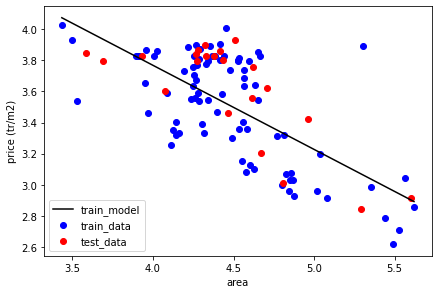

Linear model coefficient: [[-0.54040584]]
Linear model intercept: [5.92947734]
Linear model RMSE: 0.2586783311348943


In [139]:
# find model by using linear regression:
model, linear_rmse = linearRegressionModel(X_train, Y_train)

# find Y by using linear model predict:
Y_train_pred = model.predict(X_train)
# Y_test_pred = model.predict(X_test)

# Plot linear model:
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.plot(X_train, Y_train_pred, color='black', label='train_model')
# plt.plot(X_test, Y_test_pred, color='purple', label='test_model')
plt.legend()
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price (tr/m2)')
plt.show()

# Linear Model coefficient and intercept:
print("Linear model coefficient: {}".format(model.coef_))
print("Linear model intercept: {}".format(model.intercept_))

# linear_model rmse:
print("Linear model RMSE: {}".format(linear_rmse))

Polynomial Regression with degree = 35


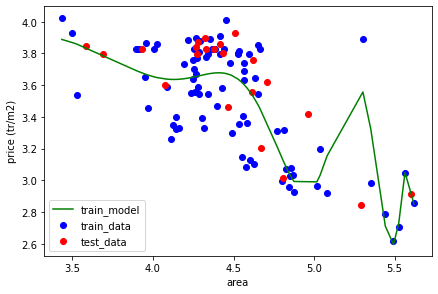

Polynomial model coefficient: [[ 1.75564309e-16  9.97875192e-17  2.86042376e-17 -6.89237936e-18
   2.13914463e-18 -1.89098279e-20 -7.94275122e-21 -2.62145389e-21
   3.25501578e-20 -9.70028486e-22 -3.60063296e-21 -1.30731294e-20
  -4.64334957e-20 -1.61243073e-19 -5.46769745e-19 -1.80719908e-18
  -5.80756078e-18 -1.80854343e-17 -5.43428177e-17 -1.56676114e-16
  -4.30243717e-16 -1.11425920e-15 -2.68457374e-15 -5.89897525e-15
  -1.14652253e-14 -1.87014032e-14 -2.29706885e-14 -1.50321009e-14
   7.91874335e-15  1.81921757e-14 -1.53548333e-14  5.14735618e-15
  -9.02910729e-16  8.49816423e-17 -3.81794213e-18  5.21453951e-20]]
Polynomial model intercept: [3.9540403]
Polynomial Model RMSE: 0.20812329233118962


In [140]:
poly_model, poly_rmse, degree = polynomialRegression(X_train, Y_train)
print("Polynomial Regression with degree = {}".format(degree))

# transform X and X_test:
polynomial_features = PolynomialFeatures(degree=degree)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

# Try predicting Y
Y_train_poly_pred = poly_model.predict(X_train_poly)
# Y_test_poly_pred = poly_model.predict(X_test_poly)

# Plot model:
plt.scatter(X_train, Y_train, marker='o', color='blue', label='train_data')
plt.scatter(X_test, Y_test, marker='o', color='red', label='test_data')
plt.plot(X_train, Y_train_poly_pred, color='green', label='train_model')
# plt.plot(X_test, Y_test_poly_pred, color='purple', label='test_model')
plt.legend()
plt.tight_layout()
plt.xlabel('area')
plt.ylabel('price (tr/m2)')
plt.show()

# Polynomial Model coefficient and intercept:
print("Polynomial model coefficient: {}".format(poly_model.coef_))
print("Polynomial model intercept: {}".format(poly_model.intercept_))

# poly_model rmse:
print("Polynomial Model RMSE: {}".format(poly_rmse))

In [141]:
# score the model with test data:

# Linear score:
print("\n\n")
print("Linear Model score on train dataset: ", model.score(X_train, Y_train))
print("Linear Model score on test dataset: ", model.score(X_test, Y_test))

# Poly score:
print("\n")
print("Poly Model score on train dataset: ", poly_model.score(X_train_poly, Y_train))
print("Poly Model score on test dataset: ", poly_model.score(X_test_poly, Y_test))




Linear Model score on train dataset:  0.4509961165176152
Linear Model score on test dataset:  0.4949105760385929


Poly Model score on train dataset:  0.6446169661458776
Poly Model score on test dataset:  0.3913614549490011
